### Student Information
Name:嚴幼珊

Student ID: 110062531

GitHub ID: bubu3013

Kaggle name: Silvia Yen

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)
![pic0](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [1]:
### Begin Assignment Here

# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
    
#### New Libraries to intsall:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`
    
                                                                                            
                                                                                           

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
# concatenate
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)#do the complete dataset
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


### Training data

In [7]:
import nltk

In [8]:
top_N = 30

word_dist = nltk.FreqDist(train_df['text'])

In [9]:
word_frequenct = []

In [10]:
word_frequency = train_df.text.str.split(expand=True).stack().value_counts()
word_frequency = word_frequency[:30]

In [11]:
# save a list of word_frequency's index
x_label = word_frequency.index
y_label = word_frequency.values

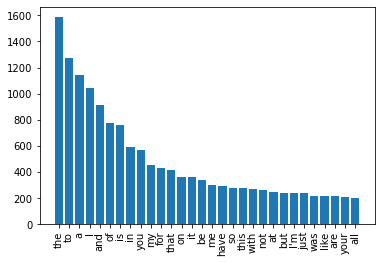

In [12]:
# reference: 
# https://vimsky.com/zh-tw/examples/usage/matplotlib-pyplot-hist-in-python.html
# https://www.delftstack.com/zh-tw/howto/matplotlib/set-x-axis-values-matplotlib/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# draw a histogram
# 調整y軸大小
# 調整x字的方向

plt.bar(x_label,y_label, tick_label=x_label)
plt.xticks(x_label,word_frequency.index)
plt.xticks(rotation=90)


plt.show()

### Test data

In [13]:
top_N = 30

word_dist = nltk.FreqDist(test_df['text'])

In [14]:
word_frequenct = []

In [15]:
word_frequency = test_df.text.str.split(expand=True).stack().value_counts()
word_frequency = word_frequency[:30]

In [16]:
# save a list of word_frequency's index
x_label = word_frequency.index
y_label = word_frequency.values

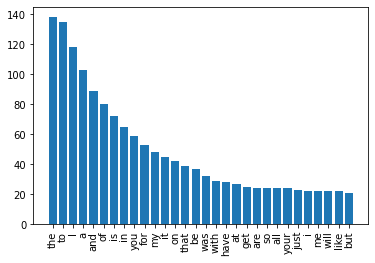

In [17]:
# reference: 
# https://vimsky.com/zh-tw/examples/usage/matplotlib-pyplot-hist-in-python.html
# https://www.delftstack.com/zh-tw/howto/matplotlib/set-x-axis-values-matplotlib/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# draw a histogram
# 調整y軸大小
# 調整x字的方向

plt.bar(x_label,y_label, tick_label=x_label)
plt.xticks(x_label,word_frequency.index)
plt.xticks(rotation=90)


plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [18]:
## save to pickle file
## if the data is big, pickle is efficient
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [19]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [20]:
# train_df.groupby(['emotion']).size(): with NaN
# train_df.groupby(['emotion']).count(): without NaN
# train_df.groupby(['emotion']).mean(): get the mean value

In [21]:
#group to find distribution
train_df.groupby(['emotion']).count()['text'] # groupby: 根據某些條件將數據分成幾組

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

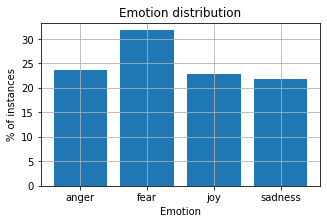

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique() #處理DataFrame的單列時使用，並返回一列的所有唯一元素
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3)) #lamba: 匿名函式, round(x):DataFrame四捨五入到小數位數x

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [25]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text']) #.fit():算均值，平方差啊，最大/小值。可以理解為一個訓練過程。
# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text']) #.transform():在Fit的基礎上，進行標準化，降維，歸一化等操作
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])   # fit_transform() = fit() + transform()

In [26]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [27]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [28]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [30]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names() # get the values of the cols
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [31]:
# feature_names

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [32]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [33]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
# fit to learn the token
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\Silvia\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [34]:
train_data_BOW_features_500.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 8, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country']

In [36]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [37]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
TFIDF_1000 = TfidfVectorizer(max_features=1000)
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
TFIDF_1000.fit(train_df['text'])
# 2. Transform documents to document-term matrix.
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country']

In [38]:
"""
TF-IDF 做了以下這樣的假設：
一個『詞彙』越常出現在一篇『文件』中，這個『詞彙』越重要
一個『詞彙』越常出現在多篇『文件』中，這個『詞彙』越不重要
"""

'\nTF-IDF 做了以下這樣的假設：\n一個『詞彙』越常出現在一篇『文件』中，這個『詞彙』越重要\n一個『詞彙』越常出現在多篇『文件』中，這個『詞彙』越不重要\n'

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [40]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0) 
# https://www.twblogs.net/a/5c2f92c7bd9eee35b3a4b63e

## training!
DT_model = DT_model.fit(X_train, y_train)
# fit(x, y, batch_size, ...)
# https://blog.csdn.net/qq_41617848/article/details/99969963

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'sadness', 'anger', 'anger', 'fear', 'fear',
       'joy', 'sadness', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [41]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [42]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))
# (classification_report(y_true, y_pred, target_names=target_names))
# https://www.cnblogs.com/178mz/p/8558435.html

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [43]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

# confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
# y_true: 是樣本真實分類結果，y_pred: 是樣本預測分類結果
# labels：是所給出的類別，通過這個可對類別進行選擇
# sample_weight : 樣本權重

[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [44]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

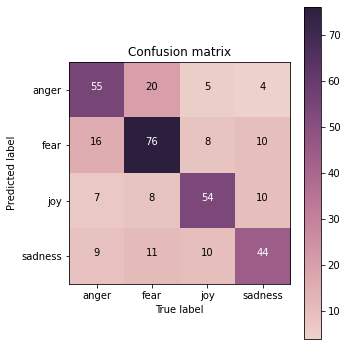

In [45]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [46]:
# Answer here
#reference:https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
"""
1. What is a cufusion matrix?
    Compute confusion matrix to evaluate the accuracy of a classification.
    A confusion matrix  C(i,j) is equal to the number of observations 
    known to be in group 'i" and predicted to be in group "j".

    Take the number 14 for example. C(0,2)=C(anger, fear)
    There are 14 emotions labed as "anger" but predicted as "fear".

    As the color become darker, the accuracy is higher.

2. About Accuracy.

    The accuracy is as following. 
    The training accuracy: 0.99
    The testing accuracy: 0.66

3. The precision and recall in anger, fear, joy and sadness.
              precision    recall  

           anger       0.63      0.65 
            fear       0.66      0.69 
             joy       0.70      0.68  
         sadness       0.65      0.59 
    The joy has the highest presision and the fear has the highest recall.
    The anger has the lowest presision and the sadness has the lowest recall.
    
4. The overall training accuracy: 0.99, abd testing accuracy: 0.66. 
   This is overfitting because model perform well in training data but poorly in testing data.
"""

'\n1. What is a cufusion matrix?\n    Compute confusion matrix to evaluate the accuracy of a classification.\n    A confusion matrix  C(i,j) is equal to the number of observations \n    known to be in group \'i" and predicted to be in group "j".\n\n    Take the number 14 for example. C(0,2)=C(anger, fear)\n    There are 14 emotions labed as "anger" but predicted as "fear".\n\n    As the color become darker, the accuracy is higher.\n\n2. About Accuracy.\n\n    The accuracy is as following. \n    The training accuracy: 0.99\n    The testing accuracy: 0.66\n\n3. The precision and recall in anger, fear, joy and sadness.\n              precision    recall  \n\n           anger       0.63      0.65 \n            fear       0.66      0.69 \n             joy       0.70      0.68  \n         sadness       0.65      0.59 \n    The joy has the highest presision and the fear has the highest recall.\n    The anger has the lowest presision and the sadness has the lowest recall.\n    \n4. The overall

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


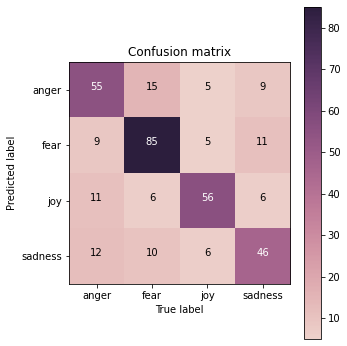

In [47]:
# Answer here

from sklearn.naive_bayes import MultinomialNB

## build Naive Bayes model
NB_model = MultinomialNB()
# https://www.twblogs.net/a/5c2f92c7bd9eee35b3a4b63e

## training!
NB_model = NB_model.fit(X_train, y_train)
# fit(x, y, batch_size, ...)
# https://blog.csdn.net/qq_41617848/article/details/99969963

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
print(classification_report(y_true=y_test, y_pred=y_test_pred))

NB_cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(NB_cm)

plot_confusion_matrix(NB_cm, classes=my_tags, title='Confusion matrix')

In [48]:
# Answer here
# Analysis
"""
1.  About Accuracy.

    The accuracy is as following. 
    The training accuracy: 0.79
    The testing accuracy: 0.7

2.  The precision and recall in anger, fear, joy and sadness.

              precision    recall

       anger       0.63      0.65  
        fear       0.73      0.77 
         joy       0.78      0.71
     sadness       0.64      0.62
    The joy has the highest presision and the fear has the highest recall.
    The anger has the lowest presision and the sadness has the lowest recall.

3.  The overall training accuracy: 0.79, abd testing accuracy: 0.7. 
    This is neither overfitting nor underfitting. The result is goold.
"""

'\n1.  About Accuracy.\n\n    The accuracy is as following. \n    The training accuracy: 0.79\n    The testing accuracy: 0.7\n\n2.  The precision and recall in anger, fear, joy and sadness.\n\n              precision    recall\n\n       anger       0.63      0.65  \n        fear       0.73      0.77 \n         joy       0.78      0.71\n     sadness       0.64      0.62\n    The joy has the highest presision and the fear has the highest recall.\n    The anger has the lowest presision and the sadness has the lowest recall.\n\n3.  The overall training accuracy: 0.79, abd testing accuracy: 0.7. \n    This is neither overfitting nor underfitting. The result is goold.\n'

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [49]:
# Answer here
"""
1.  How do the results from the Naive Bayes model and the Decision Tree model compare?
    從Naive Bayes 跟Decision Tree model 結果比較寫出來

    The accuracy of training data in the Naive Bayes is 0.79 abd the testing accuracy: 0.7.
    The accuracy of training data in the Decision Tree model is 0.99 and the testing accuracy: 0.66.
    Just as lectures say, decision tree tends to be overfitting. 
    and Naive Bayes can perform well in most of cases.

2.  How do you interpret these differences?
ex. accuracy is the same but not the same in presision. 要預測哪種情緒用哪種model比較好? (presision, recall)

    Now let's have a look at the presision and recall of each emotion.
    anger: the precision in the Naive Bayes model is 0.63 and the recall is 0.65.
           the precision in the Decision Tree model is 0.63 and the recall is 0.65 as well.
           So the two models has a very same results.
           
    fear:  the precision in the Naive Bayes model is 0.73 and the recall is 0.77.
           the precision in the Decision Tree model is 0.66 and the recall is 0.69.
           So the Naive Bayes model performs better in fear cases.
           
    joy:   the precision in the Naive Bayes model is 0.78 and the recall is 0.71.
           the precision in the Decision Tree model is 0.70 and the recall is 0.70.
           So the Naive Bayes model performs better in joy cases.
           
   sadness:the precision in the Naive Bayes model is 0.64 and the recall is 0.62.
           the precision in the Decision Tree model is 0.65 and the recall is 0.59.
           So the Decision Tree model has a higer precision but the Naive Bayes model has a higher recall.  
    Overall, the Naive Bayes model performs well in both fear and joy cases.
    the two model has similar results in anger and sadness cases.
"""

"\n1.  How do the results from the Naive Bayes model and the Decision Tree model compare?\n    從Naive Bayes 跟Decision Tree model 結果比較寫出來\n\n    The accuracy of training data in the Naive Bayes is 0.79 abd the testing accuracy: 0.7.\n    The accuracy of training data in the Decision Tree model is 0.99 and the testing accuracy: 0.66.\n    Just as lectures say, decision tree tends to be overfitting. \n    and Naive Bayes can perform well in most of cases.\n\n2.  How do you interpret these differences?\nex. accuracy is the same but not the same in presision. 要預測哪種情緒用哪種model比較好? (presision, recall)\n\n    Now let's have a look at the presision and recall of each emotion.\n    anger: the precision in the Naive Bayes model is 0.63 and the recall is 0.65.\n           the precision in the Decision Tree model is 0.63 and the recall is 0.65 as well.\n           So the two models has a very same results.\n           \n    fear:  the precision in the Naive Bayes model is 0.73 and the recall is 0.77

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [50]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [51]:
# https://exerror.com/found-conflicts-looking-for-incompatible-packages-this-can-take-several-minutes-press-ctrl-c-to-abort/
# https://www.codenong.com/cs122153985/

In [52]:
## deal with label (string -> one-hot)
# https://blog.csdn.net/MSJ_nb/article/details/117462928
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    #return keras.utils.to_categorical(enc)
    y_train = np_utils.to_categorical(enc)
    return y_train

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1007       fear
3526    sadness
2246        joy
3371    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [53]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [54]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [55]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\Silvia\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 2ms/step - loss: 1.3396 - accuracy: 0.3479 - val_loss: 1.3034 - val_accuracy: 0.4179
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 1.0098 - accuracy: 0.6360 - val_loss: 0.9403 - val_accuracy: 0.6427
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7944 - val_loss: 0.8038 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8445 - val_loss: 0.8224 - val_accuracy: 0.6801
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8815 - val_loss: 0.8376 - val_accuracy: 0.6859
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.9078 - val_loss: 0.9213 - val_accuracy: 0.6686
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9303 - val_loss: 0.9781 - val_accuracy: 0.6772
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [56]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[1.00879435e-04, 9.45716441e-01, 1.90051229e-04, 5.39926291e-02],
       [2.89667561e-03, 9.83369410e-01, 7.46405078e-03, 6.26990013e-03],
       [1.44932303e-04, 1.15696428e-04, 1.47106826e-01, 8.52632523e-01],
       [9.99927521e-01, 7.20782118e-05, 3.35953096e-08, 3.39986968e-07],
       [4.90373895e-02, 9.23724055e-01, 1.32148678e-03, 2.59170700e-02]],
      dtype=float32)

In [57]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'sadness', 'anger', 'fear'], dtype=object)

In [58]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [59]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.347910,1.339550,0.417867,1.303351
1,1,0.636037,1.009841,0.642651,0.940300
2,2,0.794354,0.578408,0.691643,0.803777
3,3,0.844451,0.411067,0.680115,0.822359
4,4,0.881539,0.323444,0.685879,0.837607
5,5,0.907833,0.258544,0.668588,0.921298
6,6,0.930252,0.214912,0.677233,0.978068
7,7,0.946859,0.175232,0.665706,1.049506
8,8,0.952117,0.154182,0.674352,1.103372
9,9,0.960144,0.133135,0.677233,1.138027


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

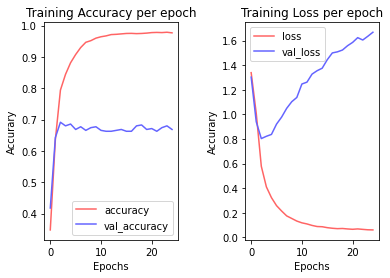

In [60]:
# Answer here
# https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python/42818547
# https://vimsky.com/zh-tw/examples/usage/matplotlib-pyplot-legend-in-python.html

import matplotlib.pyplot as plt
%matplotlib inline

#plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.legend(["accuracy", "val_accuracy"], loc='lower right')
plt.title("Training Accuracy per epoch") # title
plt.ylabel("Accurary") # y label
plt.xlabel("Epochs") # x label
plt.plot(training_log.epoch,training_log.accuracy, color=(255/255,100/255,100/255),label = "accuracy") #red 
plt.plot(training_log.epoch,training_log.val_accuracy, color=(100/255,100/255,255/255), label = "val_accuracy") #blue
plt.legend()
plt.subplot(1,2,2)

plt.title("Training Loss per epoch") # title
plt.ylabel("Accurary") # y label
plt.xlabel("Epochs") # x label

plt.plot(training_log.epoch,training_log.loss, color=(255/255,100/255,100/255), label = "loss") #red
plt.plot(training_log.epoch,training_log.val_loss, color=(100/255,100/255,255/255), label = "val_loss") #blue
plt.legend()

# https://www.delftstack.com/zh-tw/howto/matplotlib/how-to-improve-subplot-size-or-spacing-with-many-subplots-in-matplotlib/#plt.subplots_adjust-%25E6%2596%25B9%25E6%25B3%2595%25E6%259B%25B4%25E6%2594%25B9-matplotlib-%25E5%25AD%2590%25E5%259C%2596%25E9%2596%2593%25E8%25B7%259D
plt.subplots_adjust(wspace=0.5)
plt.show()

# interpret 
# reference
# https://www.cxymm.net/searchArticle?qc=val%20loss%E5%85%88%E4%B8%8B%E9%99%8D%E5%90%8E%E4%B8%8A%E5%8D%87&page=1

# Let's see the picture of training accuracy per epoch.
# As figure shows, the accuracy is higer and higher with the epochs going.
# The accuracy is even close to 1.
# However, the validation accuracy peaks at the 2nd or 3rd epoch and slightly decreses.

# Let's see the other picture of training loss per epoch.
# the training loss keep decresing and close to 0.1.
# However, the validation loss decreases before around the 3th epoch and increases after the 4th epoch.

# overfitting: perform well in training dataset but poorly in validation dataset.
# underfitting: perform poorly in both training dataset and validation dataset.

# Therefore, we can learn that this is "overfitting" because the plot matches the overfitting situation. 

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus/訓練語料庫

In [61]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1007,20150,"After #terror our leaders say, 'Don't jump to ...","[After, #, terror, our, leaders, say, ,, 'Do, ..."
3526,40699,"Amateurs sit and wait for inspiration, the res...","[Amateurs, sit, and, wait, for, inspiration, ,..."
2246,30242,Go follow #beautiful #Snowgang ♥@Amynicolehill...,"[Go, follow, #, beautiful, #, Snowgang, ♥, @, ..."
3371,40544,Damn gud #premiere #LethalWeapon...#funny and ...,"[Damn, gud, #, premiere, #, LethalWeapon, ...,..."
2598,30594,"@CohenDS Yell, 'Bye, garbage!' cheerfully afte...","[@, CohenDS, Yell, ,, 'Bye, ,, garbage, !, ', ..."


In [62]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['After', '#', 'terror', 'our', 'leaders', 'say', ',', "'Do", "n't", 'jump', 'to', 'conclusions', ',', "'", 'but', '[', 'in', 'matters', 'of', '#', 'racial', 'unrest', ']', ',', 'they', 'are', 'silent', '.', 'Why', 'is', 'that', '?', '@', 'greggutfeld']),
       list(['Amateurs', 'sit', 'and', 'wait', 'for', 'inspiration', ',', 'the', 'rest', 'of', 'us', 'just', 'get', 'up', 'and', 'go', 'to', 'work', '.', "'", '--', 'Stephen', 'King', '#', 'authors', '#', 'serious', '#', 'writingtip']),
       list(['Go', 'follow', '#', 'beautiful', '#', 'Snowgang', '♥', '@', 'Amynicolehill12', '♥', '#', 'Princess', '#', 'fitness', '#', 'bodyposi', '#', 'haircut', '#', 'smile', '#', 'Whitegirlwednesday'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [63]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1007,20150,"After #terror our leaders say, 'Don't jump to ...","[After, #, terror, our, leaders, say, ,, 'Do, ..."
3526,40699,"Amateurs sit and wait for inspiration, the res...","[Amateurs, sit, and, wait, for, inspiration, ,..."
2246,30242,Go follow #beautiful #Snowgang ♥@Amynicolehill...,"[Go, follow, #, beautiful, #, Snowgang, ♥, @, ..."
3371,40544,Damn gud #premiere #LethalWeapon...#funny and ...,"[Damn, gud, #, premiere, #, LethalWeapon, ...,..."
2598,30594,"@CohenDS Yell, 'Bye, garbage!' cheerfully afte...","[@, CohenDS, Yell, ,, 'Bye, ,, garbage, !, ', ..."


In [64]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

# https://blog.csdn.net/lcy6239/article/details/115786432
# size-> vector_size
# iter-> epochs
## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [65]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.15470672,  0.3247248 , -0.1112086 ,  0.26129472, -0.04091675,
       -0.8712643 ,  0.64043844,  1.1896272 , -0.6555736 , -0.5563149 ,
       -0.62404007, -0.48337126, -0.5840538 , -0.16646641,  0.11123043,
       -0.5955115 ,  0.28460953, -0.59554   ,  0.30340037, -1.2723908 ,
        0.26017582,  0.53945434,  0.62527037,  0.06415605,  0.28312388,
        0.03192535, -0.7166872 ,  0.6219056 , -0.50248164,  0.27065355,
        0.58881694, -0.19948685,  0.29828092, -0.6914518 , -0.6201879 ,
        0.20028748,  0.4596434 , -0.11183695, -0.57500637, -0.83416724,
        0.4044667 ,  0.15686235, -0.4219569 ,  0.5217356 ,  0.5401151 ,
       -0.19052704, -0.61289966, -0.39889374,  0.5634235 ,  0.31341812,
       -0.23576787, -0.31477433,  0.47250098,  0.07016538, -0.35807207,
       -0.5089254 ,  0.10588123, -0.41216815, -0.5702545 , -0.04556134,
       -0.14418212, -0.13323197,  0.3506004 , -0.01894595, -0.5256085 ,
        0.35228926,  0.40225333,  0.31777495, -1.6225976 ,  0.47

In [66]:
# Get the most similar words
# https://github.com/RaRe-Technologies/gensim/issues/3028
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9371412396430969),
 ('bday', 0.9189438223838806),
 ('birthday', 0.9185341596603394),
 ("'be", 0.9177688360214233),
 ('down\\nI', 0.9174953103065491),
 ('establishment', 0.9171268343925476),
 ('free', 0.9124040603637695),
 ('farm365', 0.9062500596046448),
 ('O', 0.9055880904197693),
 ('blessed', 0.9022203683853149)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [67]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "C:/Users/Silvia/OneDrive - 清華大學/桌面/110 Fall/資料探勘/DM2021-Lab2-master-main/GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [68]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context #python做爬蟲，對於有的網站需要驗證

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [69]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


## Answer here

#### I use doc2vec

In [79]:
# https://clay-atlas.com/blog/2020/07/14/python-cn-nlp-gensim-doc2vec-model/

In [80]:
from gensim.models import doc2vec
from collections import namedtuple

In [76]:
# preprocess
docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for index, text in enumerate(train_df['text']):
    words = text.split()
    docs.append(analyzedDocument(words, [index]))

In [85]:
from gensim.models import Doc2Vec

def train(x_train, size=300):
    model = Doc2Vec(x_train,min_count=1,window=3,sample=1e-3,negative=5,workers=4)
    model.train(x_train,total_examples=model.corpus_count,epochs=10)
    return model

model_dm = train(docs)

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [86]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [87]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [88]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [89]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [90]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

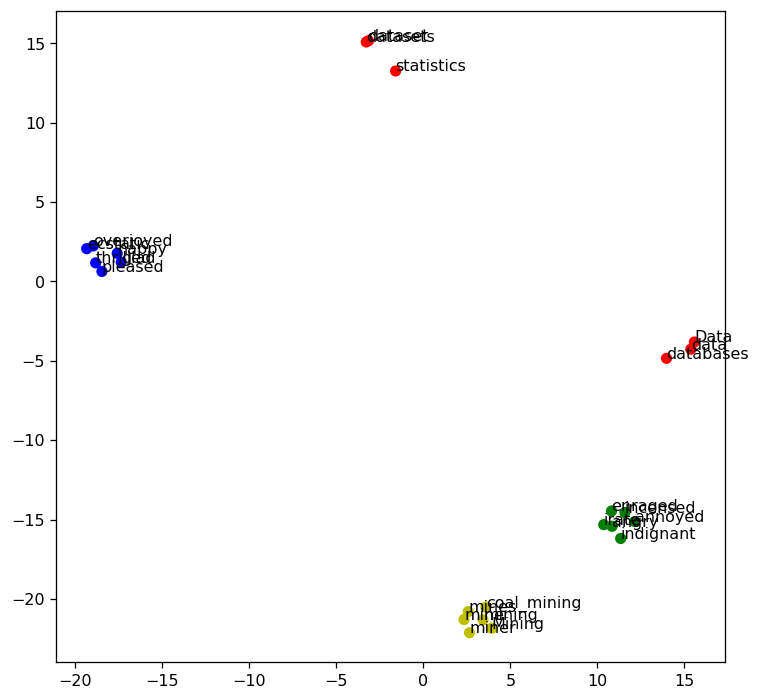

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
# https://stackoverflow.com/questions/66868221/gensim-3-8-0-to-gensim-4-0-0
# all_word = list(model.vocab.keys())
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [92]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 14 # 0~14: total 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words_ = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words_)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad', 'plea

---

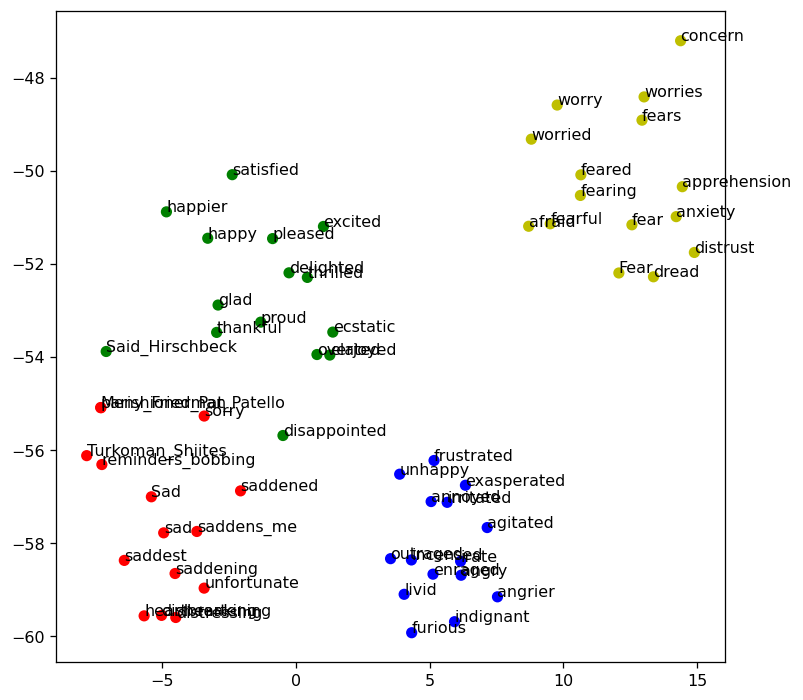

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 2000
target_size = len(target_words_)
# https://stackoverflow.com/questions/66868221/gensim-3-8-0-to-gensim-4-0-0
# all_word = list(model.vocab.keys())
all_word = list(model.index_to_key)
word_train = target_words_ + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words_, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## A report of my work developping the model for the competition 

(You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Preprocessing

## Remove emoji.
After I read the json file, I found that there are many puctunation and emoji in the text, which we should clean from the data.
I must remove emojis and punctuations since all we need is text only. The cell below is modified from the website, https://poopcode.com/how-to-remove-emoji-from-text-in-python/, I also use regular languages to define a function.

In [ ]:
from string import punctuation

import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


def remove_punctuation_emoji(value):
    value = remove_emojis(value)
    return ''.join([c for c in value if (c not in punctuation)])

# Feature engineering
The next step is feature engineering. I construct a data structure to save the data.
There are 6 main classes of data, including train(for train data), test(for test data), emotion_map(for 8 types of emotions), tweep_map(the encoded map), max_voc(for the length of tweep_map), max_l(for the longest list to append 0). The subclasses of trains and test are defined as their name to store the corresponding data.

In [ ]:
data = {
    "train":{
        "<id>":{
            "emotion":"",
            "emotion_class":1,
            "text":"",
            "text_calss":[],
        }  
    },
    "test":{
        "<id>":{
            "text":"",
            "text_calss":[],
        },
    },
    "emotion_map":{},
    "tweet_map":{},
    "max_voc":1,
    "max_l":1,
}

# Data Preprocessing

## Import json

To import “tweets_DM.json”, I tried many functions because this json cannot be read directly by read_json(). In this case, and finally read the text from tweets_DM.json. 

In [ ]:
import json
with open("../input/dm2021-lab2-hw2/tweets_DM.json","r") as file:
    tweets_json_list = [eval(f) for f in file.readlines()]

I call function to remove punctuations and emojis from tweets’ text.

In [ ]:
tweets_user = {u['_source']["tweet"]["tweet_id"]:remove_punctuation_emoji(u['_source']["tweet"]["text"]) for u in tweets_json_list}

## Import Emotion

To import “emotion.csv”, I modified function from this website, 
https://blog.csdn.net/u013402321/article/details/80277022, to successfully read all the text from emotion.csv. I store the data as a dictionary, keys for id and values for emotion.

In [ ]:
import csv

emotion = None
with open("../input/dm2021-lab2-hw2/emotion.csv",newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    _ = next(reader)
    emotion = {rows[0]:rows[1] for rows in reader} #row[0]:key row[1]:data, dict as a key value

## Import Data Identification

To import “data_identification.csv”, I modified function from this website, 
https://blog.csdn.net/u013402321/article/details/80277022, to successfully read all the text from data_identification.csv. I store the data as a dictionary, keys for id and values for identification.

In [ ]:
data_identification = None

with open("../input/dm2021-lab2-hw2/data_identification.csv",newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    _ = next(reader) # iterate once to skip the first line
    data_identification = {rows[0]: rows[1] for rows in reader} 

# Data Preprocessing

## Create Data

I categorized data as two types, “train” and “test”. The data[“train”][k] stores the id whose identification is train while data[“train”][k] stores the id of the test data. 

In [ ]:
key_to_remove = []
for k in data["train"].keys():
    if k in tweets_user:
        data["train"][k]["text"] = tweets_user[k]
    else:
        key_to_remove.append(k)

for k in key_to_remove:
    data["train"].pop(k)

I remove the data whose user is not in our list of “tweets_user.” 

In [ ]:
key_to_remove = []
for k in data["train"].keys():
    if k in tweets_user:
        data["train"][k]["text"] = tweets_user[k]
    else:
        key_to_remove.append(k)

for k in key_to_remove:
    data["train"].pop(k)

In [ ]:
key_to_remove = []
for k in data["test"].keys():
    if k in tweets_user:
        data["test"][k]["text"] = tweets_user[k]
    else:
        key_to_remove.append(k)

for k in key_to_remove:
    data["test"].pop(k)

I remove the data without emotion from data[“train”]. 

In [ ]:
key_to_remove = []
for k in data["train"].keys():
    if k in emotion:
        data["train"][k]["emotion"] = emotion[k]
    else:
        key_to_remove.append(k)
    
for k in key_to_remove:
    data["train"].pop(k)

# Feature engineering

## Encode Emotion
Now, I make a list with the names of 8 types of emotions.

In [ ]:
class_emotion = []

for m in emotion.keys():
    if emotion[m] not in class_emotion:
        class_emotion.append(emotion[m])

I create an emotion_map for encoding the emotions. The below picture is the outcome, which is identical to our expectation.

In [ ]:
emotion_map = {v:i for i,v in enumerate(class_emotion)}

![pic0](img/pic1.png)

I store each training data’s emotion to “emotion_class”(the encoded emotion) by looking up the emotion_map.

In [ ]:
for k in data["train"].keys():
    data["train"][k]["emotion_class"] = emotion_map[data["train"][k]["emotion"]]

I store the emotion_map to the data structure, data[“emotion_map”].

In [ ]:
data["emotion_map"] = emotion_map

# Data Preprocessing

## Analyze Text
I use the tool tqdm to visualize data processing. I referred the literature from the website, https://clay-atlas.com/blog/2019/11/11/python-chinese-tutorial-tqdm-progress-and-ourself/, to assist me to know the remaining time. 

As title, I use a loop to count the frequency of words and store the outcome in the list, tweets_data. 

In [ ]:
from tqdm import tqdm 

In [ ]:
tweets_data = {}
for k in tqdm(tweets_user.keys()):
    users_text_list = tweets_user[k].split(" ")
    for t in users_text_list:
        t = t.lower()
        if t not in tweets_data:
            tweets_data[t] = 1
        else:
            tweets_data[t] = tweets_data[t] + 1

After counting the frequency and I found that some meaningless strings appear a lot, including ‘\r’, ‘\u’, digits, words with digits and so on. Therefore, I create the list, “remove_key”, to store their keys and remove meaningless strings.

In [ ]:
remove_key = []
for k in tweets_data.keys():
    if '\r' in k:
        remove_key.append(k)
    elif r'\u' in k:
        remove_key.append(k)
    elif '"\"' in k:
        remove_key.append(k)
    elif k.isdigit():
        remove_key.append(k)
    elif k == '':
        remove_key.append(k)
    elif k[0].isdigit():
        remove_key.append(k)
    elif len(k)>10:
        remove_key.append(k)
    elif '0' in k:
        remove_key.append(k)
    elif '1' in k:
        remove_key.append(k)
    elif '2' in k:
        remove_key.append(k)
    elif '3' in k:
        remove_key.append(k)
    elif '4' in k:
        remove_key.append(k)
    elif '5' in k:
        remove_key.append(k)
    elif '6' in k:
        remove_key.append(k)
    elif '7' in k:
        remove_key.append(k)
    elif '8' in k:
        remove_key.append(k)
    elif '9' in k:
        remove_key.append(k)     
        
for i in remove_key:
    tweets_data.pop(i)

To sort the tweets_data according to the frequencies of these words and store it sorted_tweets_key.

In [ ]:
sorted_tweets_key = sorted(tweets_data.keys())

# Feature engineering

To create an encoded map

The dictionary, tweet_map, is an encoded map, which encode words with a number. The empty string is the first and encode as 0. I encode the rest words by a for loop with two variables.

In [ ]:
tweet_map  = {'':0}
for i,v in enumerate(sorted_tweets_key):
    tweet_map[v] = i + 1

The variable, l_max, is to store the longest length. The cell below is to find the list with the longest strength. 

In [ ]:
l_max = 0
for k in tqdm(tweets_user.keys()):
    users_text_list = tweets_user[k].split(" ")
    embedded_text = []
    for t in users_text_list:
        t = t.lower()
        if t in tweet_map:
            embedded_text.append(tweet_map[t])
    if len(embedded_text)>l_max:
        l_max = len(embedded_text)

Append 0 to those lists and store the embebbed_text into the data structure we defined, data[“train”][index][“text_class”].

In [ ]:
for k in tqdm(data["train"].keys()):
    users_text_list = data["train"][k]["text"].split(" ")
    embedded_text = []
    for t in users_text_list:
        t = t.lower()
        if t in tweet_map:
            embedded_text.append(tweet_map[t])
    while len(embedded_text)<l_max:
        embedded_text.append(0)
    data["train"][k]["text_class"] = embedded_text

Append 0 to those lists and store the embebbed_text into the data structure we defined, data[“test”][index][“text_class”].

In [ ]:
for k in tqdm(data["test"].keys()):
    users_text_list = data["test"][k]["text"].split(" ")
    embedded_text = []
    for t in users_text_list:
        t = t.lower()
        if t in tweet_map:
            embedded_text.append(tweet_map[t])
    while len(embedded_text)<l_max:
        embedded_text.append(0)
    data["test"][k]["text_class"] = embedded_tex

As the picture, we assume that the text is **but sometimes the hurt last instead**, and we encode this word. But we our longest embedded_text is 118, which means we need to append 0 for the rest of the list. We do this in each text, called encoding the text.

![pic0](img/pic2.png) 

![pic0](img/pic3.png)

We store the tweet_map, the length of the tweet_map, and 118 into the data structure we defined, data[“tweet_map”], data[“max_voc”], and data[“max_l”]

In [ ]:
data["tweet_map"] = tweet_map
data["max_voc"] = len(tweet_map)
data["max_l"] = l_max

# Explaination of my model

I use LSTM(Long short-term memory) model from Pytorch. The reason why I use this model is because LSTM model is most **recommended** when it comes to sentiment analysis. Moreover, the training consumes too much time so I only training once and store the result as a .pt file. I screenshot and post here because I delete all the training part of my model.

According to literature, here are pros in terms of LSTM model.
LSTM is great technique for sentiment analysis. Since the meaning of a word has dependencies on the ones that preceded it. This improved NLP a lot and narrative analysis to leverage Neural Networks.

LSTM can be used for text generation. You can train the model on the text of a writer, say, and the model will be able to generate new sentences that mimics the style and interests of the writer.

Sequence-to-Sequence LSTM models are the state of the technique for translations. They also have a wide array of applications like time series forecasting.

Define a class to train the data. There are three functions required, including __init__(), __len__(), __getitem__().

![pic0](img/pic4.png)

To train the data, I use LSTM model. I modified codes from this website, https://cnvrg.io/pytorch-lstm/

![pic0](img/pic5.png) 

By the reference, https://pytorch.org/tutorials/beginner/pytorch_with_examples.html, I define this train function to train data.

![pic0](img/pic6.png)

I use the first GPU to train. Set the size of batch is 4. According to my experiences, I set learning rate(LR) 0.001 and epoch 4. The reason why I set assign variables as these values is based on my experience. It used to have greater result in terms of accuracy.

![pic0](img/pic7.png) 

Declare the list we will use when we train the data. Append data by loop. The first loop is for training data while the second one is for test data.

![pic0](img/pic8.png)

![pic0](img/pic9.png)

I divide the data into 10 shards to index the data and let DataLoader gets data from dataset according to the index.  

![pic0](img/pic10.png)

The below cells are set to train data. Load dataset to tweet_dataset and assign DataLoader with data to tweet_dataloaders. The model is LSTM_model with setting the variables. Moreover, the reason I use Adam as my optimizer is that Adam converges quicklier than other ones. 

![pic0](img/pic12.png)

Start to train. I trained on my laptop for more 10 hours with CUDA and more 6 hours on Kaggle with GPU. 

![pic0](img/pic11.png)

# Load Trained Data

I saved the training result and upload as a dataset.
After import torch and related libraries, I load the training result by PyTorch.

In [ ]:
import torch 

torch.load("../input/traineddmhw2/model_full.pt")

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import SubsetRandomSampler
from torch import nn

# Test
Define a class to test the data. There are three functions required, including __init__(), __len__(), __getitem__(). The below cell is the similar to the training part. 

In [ ]:
class TWEETDataset_test(Dataset):
    def __init__(self, name, feature):
        self.name = name
        self.feature = [torch.tensor(i) for i in feature]

    def __len__(self):
        return len(self.feature)

    def __getitem__(self, idx):
        return self.name[idx], self.feature[idx]

In [ ]:
# This script was modified from
# https://github.com/TalwalkarLab/leaf/blob/master/models/shakespeare/stacked_lstm.py
import torch

class LSTM_model(torch.nn.Module):
    def __init__(self, n_vocab=80, output = 10, embedding_dim=64, hidden_dim_1=256, nb_layers_1=1):
        super(LSTM_model, self).__init__()

        self.embedding_dim = embedding_dim
        self.hidden_dim_1 = hidden_dim_1

        self.embeddings = torch.nn.Embedding(n_vocab, embedding_dim)
        self.lstm_1 = torch.nn.LSTM(embedding_dim, hidden_dim_1, nb_layers_1)
        self.hidden2out = torch.nn.Linear(hidden_dim_1, output)

    def forward(self, seq_in):
        embeddings = self.embeddings(seq_in.t())
        lstm_out, h_state1 = self.lstm_1(embeddings)
        
        ht = lstm_out[-1]
        out = self.hidden2out(ht)

        return out

This is the test function. I define this test function with reference here, https://pytorch.org/docs/stable/torch.html. 

In [ ]:
def test(model, test_data):
    model.to(device)
    model.eval()
    
    names = []
    predicts = []

    with torch.no_grad():
        for name, data in tqdm(test_data):

            data = data.to(device)
            pred = model(data)
            _, predicted = torch.max(pred, -1)
            
            names.append(name)
            predicts.append(predicted)

    return names, predicts

The below cell is **the same** as the training part.

In [ ]:
device = torch.device("cuda:0")
batch_size = 4
LR = 0.001
epoch = 2

In [ ]:
train_x = []
train_y = []

test_name = []
test_x = []

In [ ]:
for k in data["train"].keys():
    train_x.append(data["train"][k]['text_class'])
    train_y.append(data["train"][k]['emotion_class'])
        
for k in data["test"].keys():
    test_name.append(k)
    test_x.append(data["test"][k]['text_class'])

test_dataset = TWEETDataset_test(name=test_name, feature=test_x)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
model = LSTM_model(n_vocab=data["max_voc"], output = 8, embedding_dim=128, hidden_dim_1=256, nb_layers_1=1)

Now I call test function and we can get “id” from name and “emotion” from predict.

In [ ]:
name, predict = tqdm(test(model=model,test_data=test_dataloader))

In [ ]:
def get_emotion_by_class(value):
    return list(data["emotion_map"] .keys())[list(data["emotion_map"].values()).index(value)]

I saved the result into the list, result.

result = {}
for n,p in zip(name, predict):
    p = p.cpu().tolist()
    for i,v in enumerate(n):
        result[v] = get_emotion_by_class(p[i])

# Submission 

The last part is submission. I modified the code from here, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html,
and get the output in excel format.


In [ ]:
result_id = list(result.keys())
result_values = list(result.values())

In [ ]:
import pandas
save_data = pandas.DataFrame({"id":result_id, "emotion":result_values})
save_data.to_csv("./Submission.csv",index=False)